Data Loading

Initial steps involving data loading and saving a backup copy in case of any errors 
Loading all necessary and needed modules and packages 

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

data = pd.read_csv('archive/cancer_data.csv')
backup = data.copy()


Data Cleaning And Overview

Initial data overview to check for missigness, data types, outlier ranges and basic distributions 
Mapping necessary features to binary outcomes for logistic regression
Deletion of unnecessary columns and missing value columns 

In [ ]:
data.shape #33 columns likely means 33 features 
data.info() #float type values, with diagnosis being the only object (M), no null values but column 32 is empty
data.describe() #mean seems not too far from the maximum, generally skew seems to be away from min/25%
data.isnull().sum() #unnamed is an empty column so it should be dropped 
#data.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True, errors = 'ignore')
#if data['diagnosis'].dtype == object:
#data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Exploratory Data Analysis

Checking class imbalance to see if additional sampling etc is required 
Checking for correlation using heatmaps and see which features are of important 

59.38375350140056

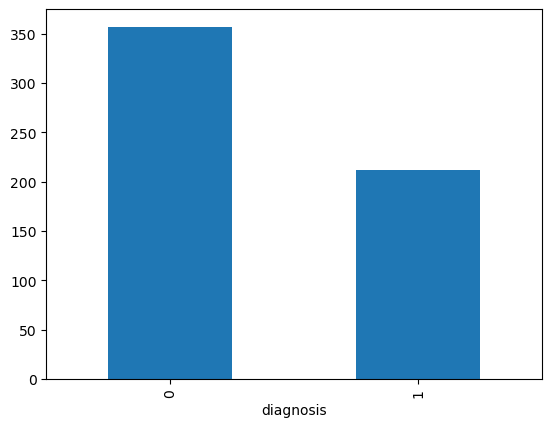

In [80]:
malignant_count = data['diagnosis'].value_counts()[1]
benign_count = data['diagnosis'].value_counts()[0]
data['diagnosis'].value_counts().plot(kind = 'bar')

(malignant_count / benign_count) * 100

#class balance looks good with a 60/40 split, shouldn't need tuning to account for class imbalance 

<Axes: >

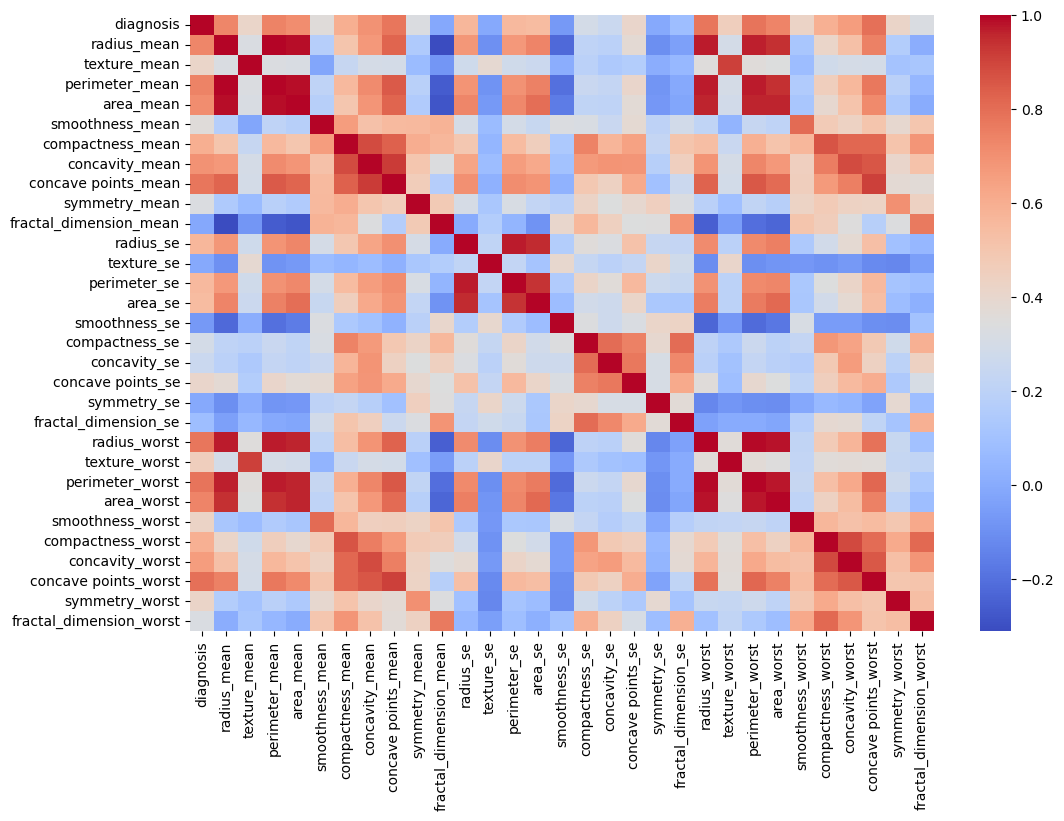

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), cmap = 'coolwarm')

#diagnosis seems to have the strongest correlation with radius_mean, perimeter_mean, concave points_mean and the worst counterparts 
#radius, perimeter and area mean are strongly correlated with eachother 
#concave points has it's strongest correlation with concavity_mean, compactness_mean, perimeter_mean, concave points_worst 

<Axes: xlabel='radius_mean', ylabel='Density'>

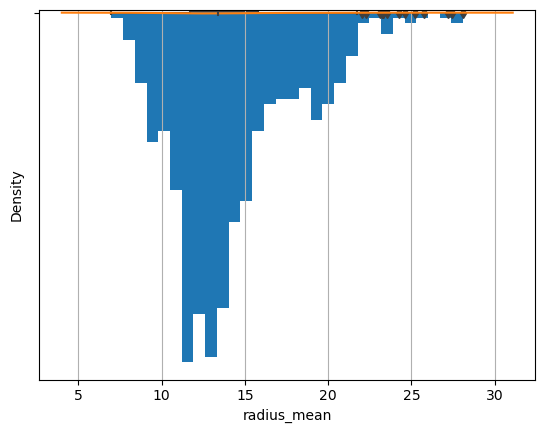

In [82]:
#Radius_mean 
data['radius_mean'].hist(bins = 30)
sns.boxplot(x = data['radius_mean'])
sns.kdeplot(data['radius_mean'])

In [ ]:
#Concave points_mean 

In [ ]:
#Perimeter_mean 

In [ ]:
#Radius worst_mean 

In [ ]:
#Concave points worst_mean 

In [ ]:
#Perimeter worst_mean

In [83]:
sns.pairplot(data[['radius_mean', 'perimeter_mean', 'concave points_mean',data['diagnosis']]], hue = data['diagnosis'])

TypeError: unhashable type: 'Series'

Model Tuning and Training

Setting scalers, training model, splitting training data 

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)


x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 42)

#explanation regarding the train test usage
#what is each variable referring to and why 42

In [22]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)


In [23]:
y_prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [24]:
y_test

,diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
69,0
542,0
176,0
501,1


In [29]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

accuracy = accuracy_score(y_test, y_prediction)

print(f'Accuracy: {accuracy: .2f}')

Accuracy:  0.98


Results and Model Effectiveness 

In [30]:
rep = classification_report(y_test, y_prediction)

print(f'Classification Report: {rep}')

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

